## 1. Importing Libraries

In [1]:
#!pip install pandas

In [6]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   -------------------------------------

In [8]:
!pip install feature_engine

   ---------------------------------------- 0.0/357.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/357.1 kB ? eta -:--:--
   -- ------------------------------------ 20.5/357.1 kB 330.3 kB/s eta 0:00:02
   ---- ---------------------------------- 41.0/357.1 kB 326.8 kB/s eta 0:00:01
   ----- --------------------------------- 51.2/357.1 kB 290.5 kB/s eta 0:00:02
   ---------- --------------------------- 102.4/357.1 kB 490.2 kB/s eta 0:00:01
   ---------------- --------------------- 153.6/357.1 kB 610.0 kB/s eta 0:00:01
   --------------------- ---------------- 204.8/357.1 kB 731.4 kB/s eta 0:00:01
   ---------------------------- --------- 266.2/357.1 kB 817.9 kB/s eta 0:00:01
   --------------------------------- ---- 317.4/357.1 kB 853.3 kB/s eta 0:00:01
   -------------------------------------- 357.1/357.1 kB 887.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
    --------------------------------------- 0.2/9.8 MB 4.8 MB/s eta 

In [10]:
!pip install matplotlib

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ---- -------------------------------- 20.5/165.5 kB 640.0 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/165.5 kB 325.1 kB/s eta 0:00:01
     ---------------- -------------------- 71.7/165.5 kB 563.7 kB/s eta 0:00:01
     ---------------------- ------------- 102.4/165.5 kB 653.6 kB/s eta 0:00:01
     -----------------------------------  163.8/165.5 kB 817.0 kB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 708.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.1/8.0 MB 3.6 MB/s eta 0:00:03
    --------------------------------------- 0.1/8.0 MB 3.6 MB/s eta 0:00:03
   - -------------------------------------- 0.2/8.0 MB 1.9 MB/s eta 0:00:05
   - -------------------------------------- 0.2/8.0 MB 1.9 MB/s eta 0:00:05
   - -------------------------------------- 0.3/8.0 MB 1.5 MB/s eta 0:00:0

In [11]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, r2_score

from feature_engine.datetime import DatetimeFeatures

import joblib

import matplotlib.pyplot as plt

## 2. Display Setting

In [12]:
pd.set_option('display.max_columns',None)

## 3. Getting Data

In [15]:
train_df = pd.read_csv("data/train_final_df.csv")

### 3.1 Split Data

In [16]:
def split_data(data):
  x = data.drop(columns=["price"])
  y = data.price.copy()
  return x,y

In [17]:
x_train, y_train = split_data(train_df)
print(x_train.shape, y_train.shape)

(54273, 12) (54273,)


### 3.2 Meta_info

In [18]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         54273 non-null  int64  
 1   hp                 54273 non-null  float64
 2   volume             54273 non-null  float64
 3   cylinders          54273 non-null  float64
 4   fuel_type          54273 non-null  object 
 5   milage             54273 non-null  int64  
 6   brand              54273 non-null  object 
 7   model              54273 non-null  object 
 8   model_year         54273 non-null  int64  
 9   transmission_type  54273 non-null  object 
 10  gears              54273 non-null  float64
 11  accident           54273 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 5.0+ MB


## 4. Data Preprocessing

In [19]:
x_train['model_year'] = pd.to_datetime(x_train['model_year'], format='%Y')

num_cols=['hp', 'volume', 'cylinders', 'milage', 'gears']

dt_cols=['model_year']

cat_cols=['fuel_type', 'brand', 'model', 'transmission_type', 'accident']

In [20]:
num_pipe = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

dt_pipe = Pipeline(steps=[
    ('date_time', DatetimeFeatures(variables=dt_cols, features_to_extract=['year'])),
    ( 'scaler', StandardScaler())
])

In [21]:
preprocessing_pipeline = ColumnTransformer(transformers=[
    ('num_pipe', num_pipe, num_cols),
    ('cat_pipe', cat_pipe, cat_cols),
    ('dt_pipe', dt_pipe, dt_cols)
])

In [22]:
preprocessing_pipeline.fit_transform(x_train)

array([[ 0.39341231, -0.15993025, -0.17780556, ...,  0.        ,
         1.        ,  0.52032471],
       [-0.29868988, -0.53142157, -0.17780556, ...,  0.        ,
         1.        , -1.44787727],
       [-0.29868988,  0.36015759,  1.10161651, ...,  0.        ,
         1.        , -1.09002236],
       ...,
       [ 0.80867362, -0.08563199, -0.17780556, ...,  1.        ,
         0.        , -0.37431255],
       [ 1.29775916,  0.21156106, -0.17780556, ...,  0.        ,
         1.        ,  1.41496198],
       [-0.65858301, -1.2744042 , -1.45722763, ...,  0.        ,
         1.        ,  1.05710707]])

## 5. Model Selection

In [23]:
algorithms = {
    'Linear Regression':LinearRegression(),
    'Random Forest':RandomForestRegressor(),
}

In [24]:
def plot_curves(sizes, mean_scores, std_scores, label, ax):
  ax.plot(
      sizes,
      mean_scores,
      marker='o',
      label=label
  )

  ax.fill_between(
      x= sizes,
      y1= mean_scores-std_scores,
      y2= mean_scores+std_scores,
      alpha=0.3
  )

In [25]:
def plot_learning_curves(name, algorithm, figsize=(12,4)):
  model=Pipeline(steps=[
      ("pre", preprocessing_pipeline),
      ("alg", algorithm)
  ])

  train_sizes,train_scores,test_scores=learning_curve(
      estimator=model,
      X=x_train,
      y=y_train,
      cv=3,
      scoring='r2',
      n_jobs=-1,
      random_state=42
      )

  mean_train_scores=np.mean(train_scores,axis=1)
  std_train_scores=np.std(train_scores,axis=1)
  train_score=f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

  mean_test_scores=np.mean(test_scores,axis=1)
  std_test_scores=np.std(test_scores,axis=1)
  test_score=f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

  fig, ax = plt.subplots(figsize=figsize)

  # training curve
  plot_curves(
      sizes=train_sizes,
      mean_scores=mean_train_scores,
      std_scores=std_train_scores,
      label=f"Train ({train_score})",
      ax=ax
  )

  # test curve
  plot_curves(
      sizes=train_sizes,
      mean_scores=mean_test_scores,
      std_scores=std_test_scores,
      label=f"Test ({test_score})",
      ax=ax
  )

  ax.set(xlabel="Training Set Size", ylabel="R-square", title=name)

  ax.legend(loc="lower right")

  plt.show()

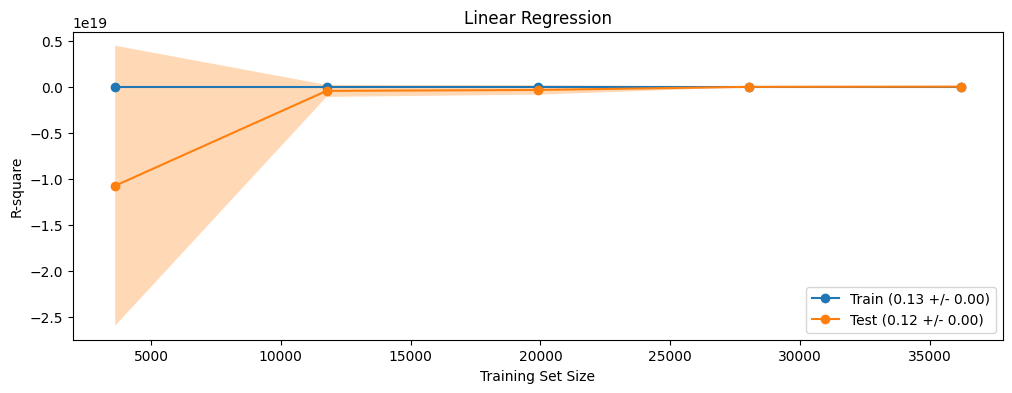

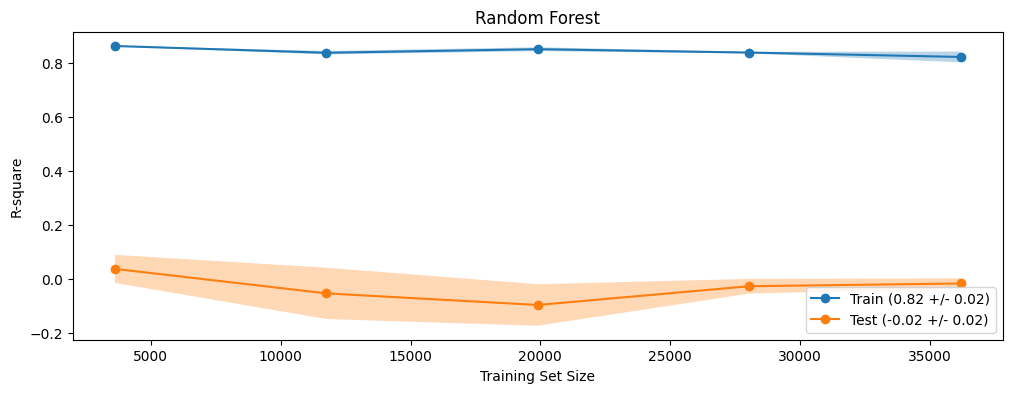

In [26]:
for name,alg in algorithms.items():
  plot_learning_curves(name, alg)

## 6. Model Training

In [28]:
model = Pipeline(steps=[
    ("pre", preprocessing_pipeline),
    ("alg", RandomForestRegressor(n_estimators=10))
])

In [29]:
model.fit(x_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['hp', 'volume', 'cylinders',
                                                   'milage', 'gears']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['fuel_type', 'brand',
                                                   'model', 'transmission_type',
                                                   'accident']),
                                                 ('dt_pipe',
                                                  Pipeline(steps=[('date_time',
                                                                   DatetimeFeatures(features_to_extract=['year'],
                                                                                    variables=['model_year'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['model_year'])])),
                ('alg', RandomForestRegressor(n_estimators=10))])

## 7. Model Evaluation

In [30]:
def evaluate_model(x, y):
    y_pred=model.predict(x)
    return r2_score(y, y_pred)

In [32]:
print(f"R2 Score on Training data is = {evaluate_model(x_train, y_train)}")

R2 Score on Training data is = 0.7738608160764757


## 8. Model Persistence

In [33]:
joblib.dump(model, "model.joblib")

['model.joblib']